In [1]:
import pandas as pd
import numpy as np
import math 
import os
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure
import seaborn as sns
%matplotlib inline

from scipy.stats import multivariate_normal
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\AMIT\OneDrive\Documents\Data Analyst_Internship_Projects\Stock Market_Data Analysis_Project\stocks.csv')

In [4]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [5]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [7]:
df.shape

(248, 8)

In [8]:
df.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of     Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  6412

In [9]:
df.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999626,0.999650,0.999176,0.999173,-0.547741
High,0.999626,1.000000,0.999654,0.999644,0.999640,-0.546175
Low,0.999650,0.999654,1.000000,0.999663,0.999661,-0.544590
Close,0.999176,0.999644,0.999663,1.000000,0.999999,-0.544194
Adj Close,0.999173,0.999640,0.999661,0.999999,1.000000,-0.544370
Volume,-0.547741,-0.546175,-0.544590,-0.544194,-0.544370,1.000000


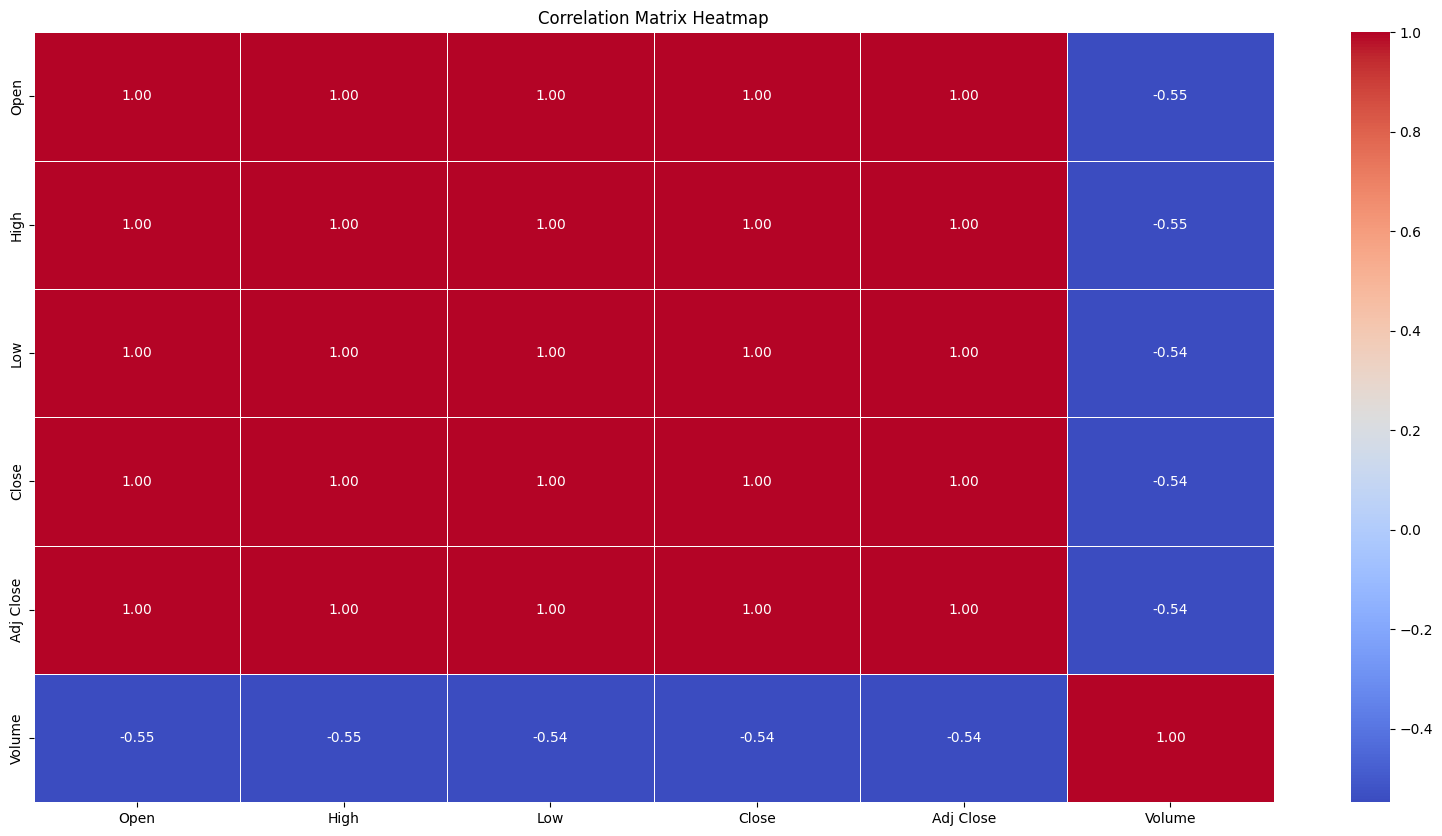

In [12]:
correlation_matrix = df.corr(numeric_only=True) 
plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()



In [21]:
profile= ProfileReport(df, title="Stock Market Analysis")

In [22]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 280.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Closing Price Distribution')

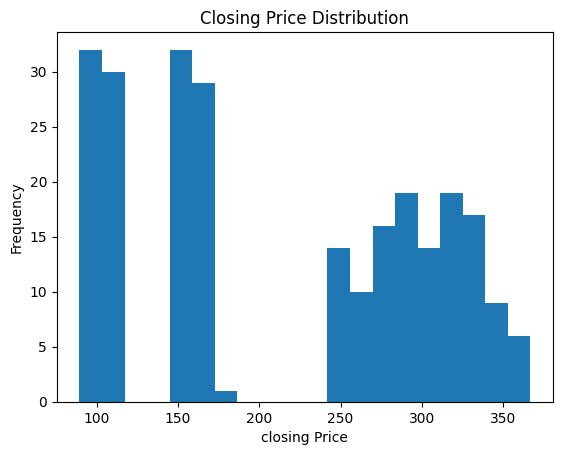

In [13]:
# the distribution of the closing prices to understand their range and frequency
plt.hist(df['Close'], bins=20) 
plt.xlabel('closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')

Text(0.5, 1.0, 'Total Volume by Ticker')

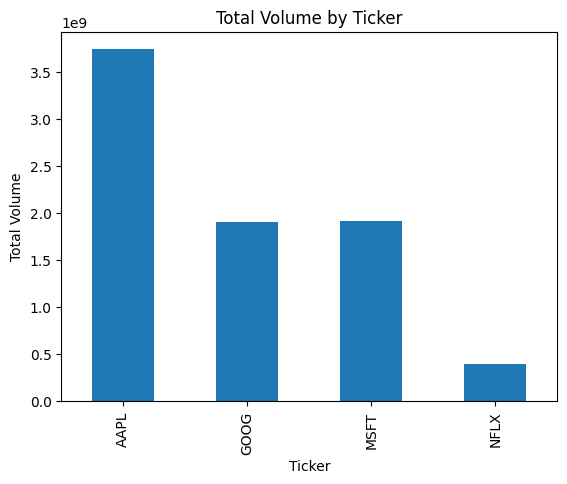

In [14]:
#The cumukative volume traded over time to observe any trends or spikes.
ticker_volume = df.groupby('Ticker') ['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')

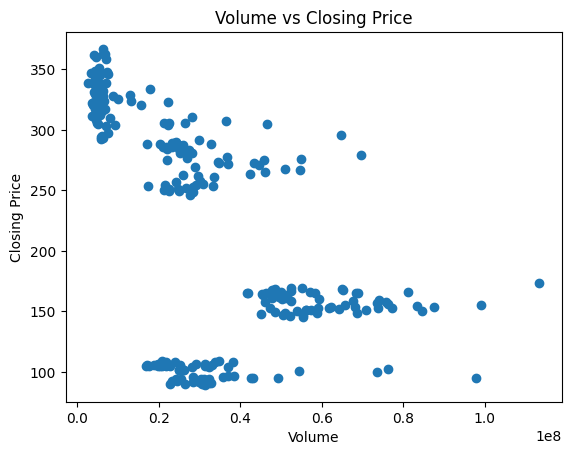

In [29]:
#Exploring the relationship between volume and closing prices, to identify any correlations.
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs Closing Price')
plt.show()

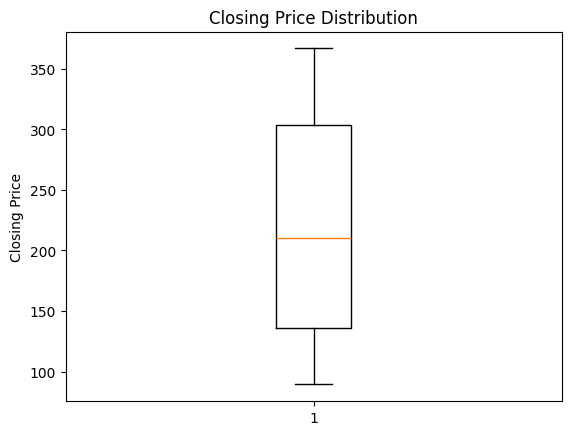

In [15]:
#Illustrating the distribution of the closing prices, including the madian, quartiles, and outliers.
plt.boxplot(df['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()


In [16]:
df.head(5)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [7]:
df['Adj Close'].value_counts()

Adj Close
163.759995    2
106.120003    2
105.120003    2
305.410004    2
153.850006    1
             ..
108.220001    1
107.709999    1
105.980003    1
105.209999    1
106.214996    1
Name: count, Length: 244, dtype: int64

In [17]:
# A variable for predicting 'n' days out into the future
forecast_out = 30
# Make another column (the target or independent variable) shifted 'n' units up 
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

    Ticker        Date        Open        High         Low       Close  \
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  Prediction  
243  107.709999  20926300         NaN  
244  105.980003  20343100         NaN  
245  106.120003  17116300         NaN  
246  105.209999  19780600         NaN  
247  106.214996  20705300         NaN  


In [32]:
print(df.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  Prediction  
0  154.414230  83322600  151.688400  
1  151.688400  64120100  150.639999  
2  150.639999  56007100  151.009995  
3  151.009995  57450700  153.850006  
4  153.850006  62199000  153.199997  


In [18]:
print(df.dtypes)

Ticker         object
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Prediction    float64
dtype: object


In [19]:
print(df.isnull().sum())

Ticker         0
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Prediction    30
dtype: int64


In [20]:
# define how many days into the future you want to predict
forecast_out = 30
# create the target column by shifting the 'Adj Close'
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

# create the independent data set (X) - Features
X = df.drop(columns=['Prediction', 'Ticker', 'Date'], errors='ignore')
X = X.select_dtypes(include=['number']).to_numpy()

# Grab the last 'n' rows of your features to predict into the future 
X_lately = X[-forecast_out:]

X = X[:-forecast_out]

#create the dependent data set (Y) - Target
Y = df['Prediction'].values
Y = Y[:-forecast_out]

In [21]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Create and support the Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf' , C=1e3, gamma=0.1)
svr_rbf.fit(X_train, Y_train)

svr_prediction = svr_rbf.predict(X_lately)
print(svr_prediction)



[229.044478 229.044478 229.044478 229.044478 229.044478 229.044478
 229.044478 229.044478 229.044478 229.044478 229.044478 229.044478
 229.044478 229.044478 229.044478 229.044478 229.044478 229.044478
 229.044478 229.044478 229.044478 229.044478 229.044478 229.044478
 229.044478 229.044478 229.044478 229.044478 229.044478 229.044478]


In [23]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

lr_prediction = lr.predict(X_lately)
print("Linear Regression Future Predictions:")
print(lr_prediction)

Linear Regression Future Predictions:
[132.02651617 126.79855061 127.17092387 130.24903165 129.00451069
 116.10331755 108.29461998 114.12398717 122.28943157 117.15417877
 121.14239993 121.01746714 123.75504742 116.64448077 115.56911868
 129.6962483  118.57016455 107.37201604 109.46991135 124.68180633
 118.45025515 129.00610426 132.53898112 121.16158676 131.8725519
 119.9017016  123.96930329 101.96168243 123.07148838 119.02061113]


In [24]:
svr_r2 = svr_rbf.score(X_test, Y_test)

print(f"SVR R-squared (R2) Score: {svr_r2:.4f}")
print (f"Model Accuracy (R2): {svr_r2 * 100:.2f}%") 


print(f"SVR Accuracy: {svr_rbf.score(X_test, Y_test):.2%}")
print(f"LR Accurcy:{lr.score(X_test, Y_test):.2%}")
   

SVR R-squared (R2) Score: -0.0607
Model Accuracy (R2): -6.07%
SVR Accuracy: -6.07%
LR Accurcy:-31.19%


In [25]:
#create a comparision dataframe 
comparison_df = pd.DataFrame({
    'Day': range(1, forecast_out + 1),
    'SVR_Prediction': svr_prediction,
    'LR_Prediction': lr_prediction
})
print(comparison_df.head())

   Day  SVR_Prediction  LR_Prediction
0    1      229.044478     132.026516
1    2      229.044478     126.798551
2    3      229.044478     127.170924
3    4      229.044478     130.249032
4    5      229.044478     129.004511


In [29]:
lr_prediction = lr.predict(X_lately)
svr_prediction = svr_rbf.predict(X_lately)

# create a datafrrame to compare results
#we take the actual 'Adj Close' from the last 'forecast_out' days
comparison_table = pd.DataFrame({
    'Original (Current) Price': df['Adj Close'].tail(forecast_out).values, 
    'SVR Predicted (Future)': svr_prediction,
    "linear Regression (future)": lr_prediction
})
#print the result
print("Comaprison Table (Aligned to 30 Days):")
print(comparison_table.head())

Comaprison Table (Aligned to 30 Days):
   Original (Current) Price  SVR Predicted (Future)  \
0                106.059998              229.044478   
1                103.059998              229.044478   
2                101.360001              229.044478   
3                101.900002              229.044478   
4                101.320000              229.044478   

   linear Regression (future)  
0                  132.026516  
1                  126.798551  
2                  127.170924  
3                  130.249032  
4                  129.004511  


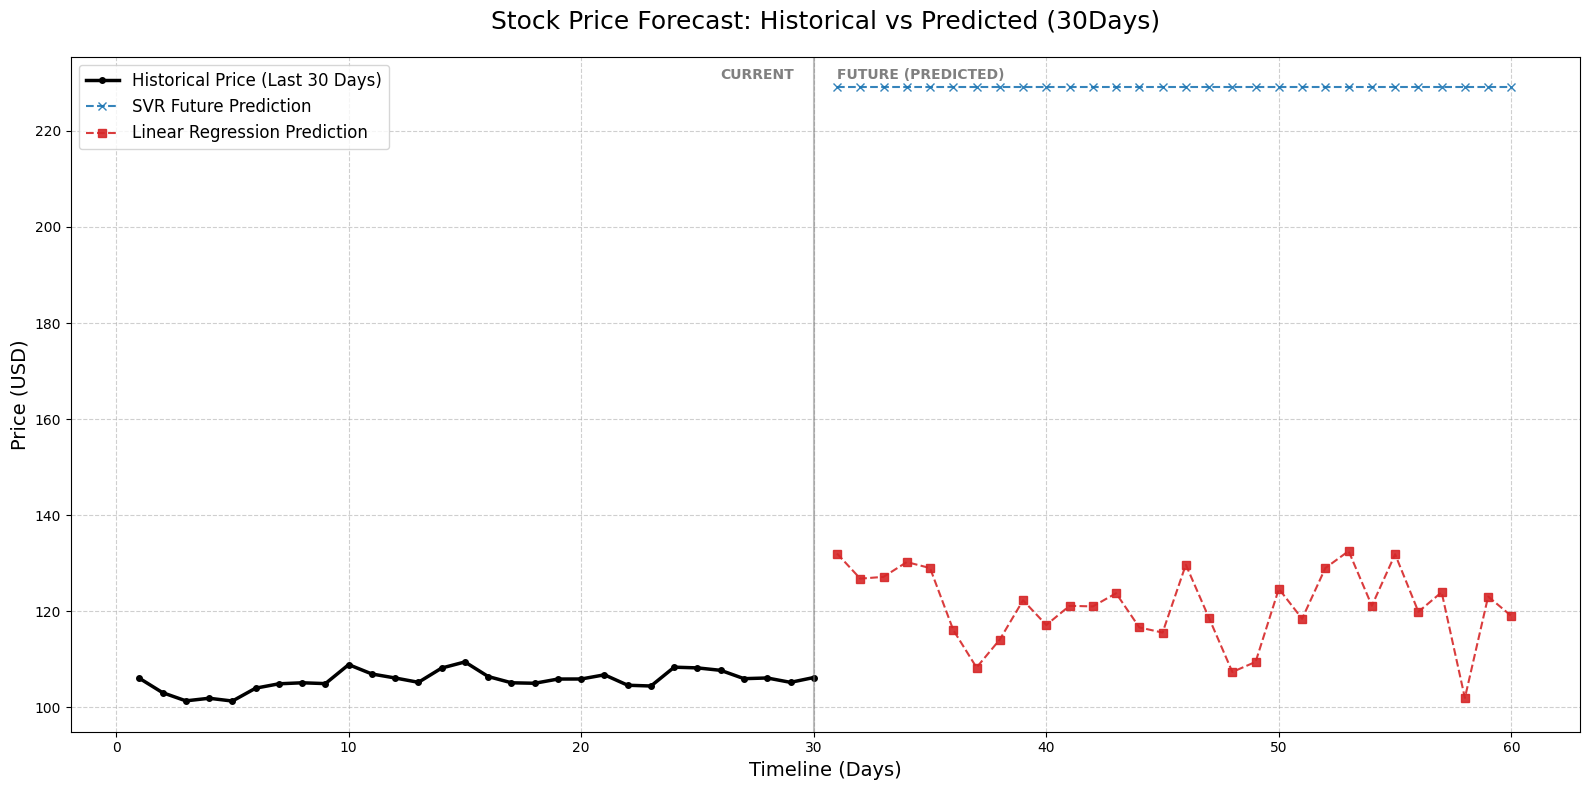

In [38]:
# Set up the figure size for a wide, clear view
plt.figure(figsize=(16, 8))

# define the time axes
# we use 1-30 for past, 31-60 for future
current_days = np.arange(1, forecast_out + 1)
future_days = np.arange(forecast_out + 1, (forecast_out * 2) + 1)

# Get tne actual prices
actual_prices = df['Adj Close'].tail(forecast_out).values

# plot Actual Data 
plt.plot(current_days, actual_prices, label='Historical Price (Last 30 Days)', color='black', linewidth=2.5, marker='o', markersize=4)

#Plot Predictions
plt.plot(future_days, svr_prediction, label='SVR Future Prediction', color='#1f77b4', linestyle='--', marker='x', alpha=0.9)
plt.plot(future_days, lr_prediction, label='Linear Regression Prediction', color='#d62728', linestyle='--', marker='s', alpha=0.9)

# Divide Past(Current) From Future
plt.axvline(x=forecast_out, color='gray', linestyle='-', alpha=0.5)
plt.text(forecast_out - 4, plt.ylim()[1] * 0.98,'CURRENT', fontweight='bold', color='gray')
plt.text(forecast_out + 1, plt.ylim()[1] * 0.98, 'FUTURE (PREDICTED)', fontweight='bold', color='gray')

# Add labels, title and Legend
plt.title(f'Stock Price Forecast: Historical vs Predicted ({forecast_out}Days)', fontsize='18', pad=20)
plt.xlabel('Timeline (Days)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Final Chart
plt.tight_layout()
plt.show()